# Visualización

Una de las herramientas más potentes que tenemos para mostrar las conclusiones a las que podemos llegar tras realizar un análisis de datos o tras aplicar ciertas transformaciones a nuestros datos brutos es su visualización mediante gráficos. En esta lección exploraremos las posibilidades que nos ofrece la base de **R** mediante la función `plot` y en segundo lugar seguiremos descubriendo las posibilidades que nos ofrece el entorno _tidyverse_ mediante la librería _ggplot2_. Esta librería implementa una gramática de gráficos, un sistema coherente para describir y construir gráficos.


## R base

El núcleo de **R** provee tres funciones básicas para dibujar gráficos que nos pueden servir para dibujar nuestros primeros gráficos. Los ejemplos usados en esta sección están extraídos del siguiente [enlace](https://bookdown.org/chescosalgado/intro_r/graficas.html#gr%C3%A1ficas-base)

### Plot

Es la función de dibujo más versátil de todas. En el libro [AprendeR](https://aprender-uib.github.io/AprendeR1/chap-plot.html) en concreto el capítulo 7 se dedica solamente a esta función. Es altamente recomendable leer este capítulo si se necesita/quiere realizar gráficos complejos con esta función. Nosotros simplemente describiremos su sintaxis más básica y veremos algunos ejemplos.

Con la función `plot`, podemos crear una amplia gama de gráficos, según los datos que esta reciba como parámetros. En la siguiente tabla resumimos todas las posibilidades disponibles para la función de trazado base **R**.

Esta función tiene un comportamiento especial, pues dependiendo del tipo de dato que le demos como argumento, generará diferentes tipos de gráfica. Además, para cada tipo de gráfico, podremos ajustar diferentes parámetros que controlan su aspecto, dentro de esta misma función.

Esta función tiene un argumento `x`, que corresponde al eje X de una gráfica. Este parámetro requiere un vector y si no especificamos este argumento, obtendremos un error. El resto de los argumentos de `plot` son opcionales puedes consultarlo con la expresión `?plot`, pero el más importante es `y` que corresponde al eje Y de nuestra gráfica.

Dependiendo del tipo de dato que pasemos como parámetros obtendremos diferentes tipos de gráficos de acuerdo a las siguientes reglas:

| Entrada                      | Salida                                                                           |
|------------------------------|----------------------------------------------------------------------------------|
| plot(x)                      | Diagrama de dispersión de vectores numéricos x                                   |
| plot(x,y)                    | Diagrama de dispersión de vectores numéricos x e y                               |
| plot(factor)                 | Diagrama de barras del factor                                                    |
| plot(factor, y)              | Diagrama de caja del vector numérico y los niveles del factor                    |
| plot(time_series)            | Gráfico de la serie temporal                                                     |
| plot(data_frame)             | Gráfica de correlación de todos columnas de marco de datos (más de dos columnas) |
| plot(function, lower, upper) | Gráfico de la función entre el valor lower y el valor upper especificado         |

A continuación veremos diferentes ejecuciones de esta función usando el ya conocido conjunto de datos de Iris.

In [2]:
data(iris)

Si solamente recibe un único vector, vemos que muestra cada valor respecto a su índice:

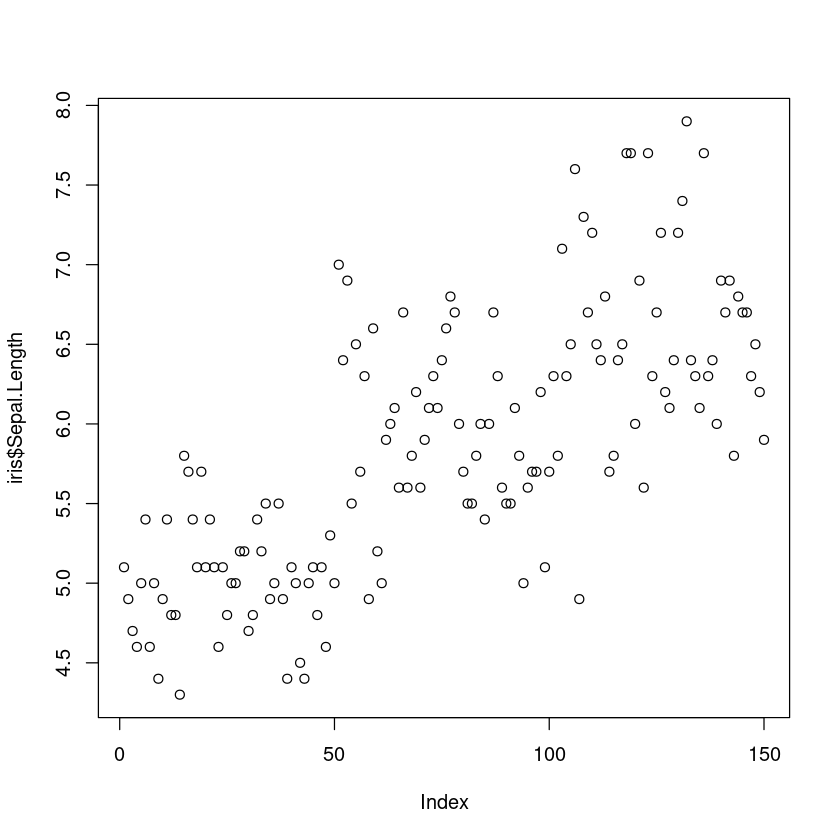

In [3]:
plot(iris$Sepal.Length)

Por otra parte, si recibe 2 vectores vemos el diagrama de dispersión. Por ejemplo podemos observar la relación entre las variables `Petal.Length` y `Petal.Width`. Esta función puede recibir multitud de parámetros diferentes, por ejemplo aquí vemos como poner un título:


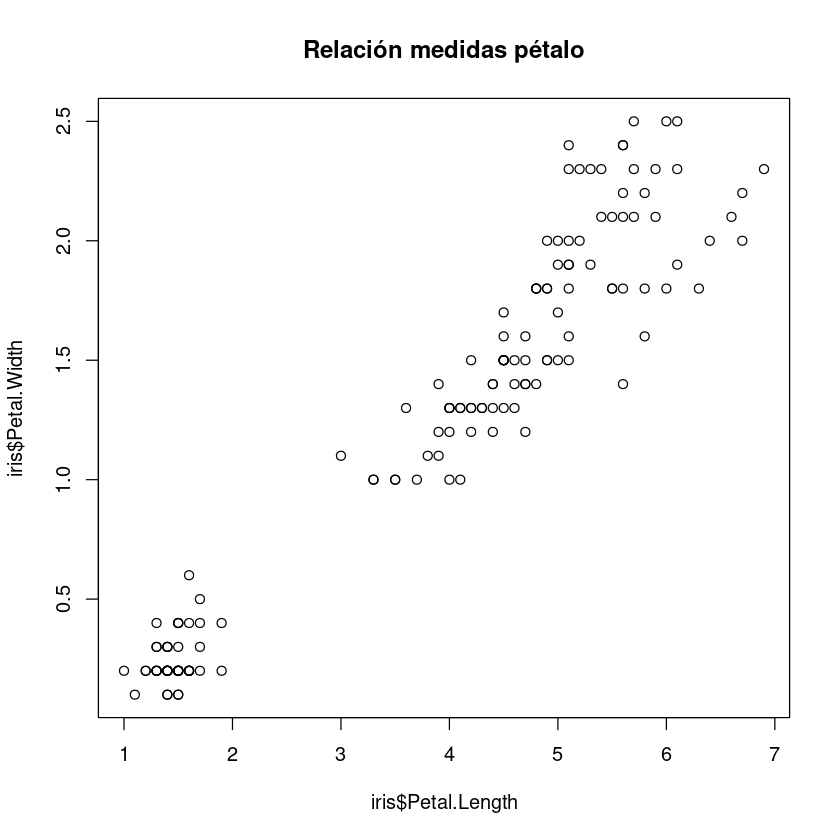

In [8]:
plot(iris$Petal.Length, iris$Petal.Width, main="Relación medidas pétalo")

Esta función también es útil con factores. A continuación veremos como nos muestra el número de ocurrencias de cada categoría:

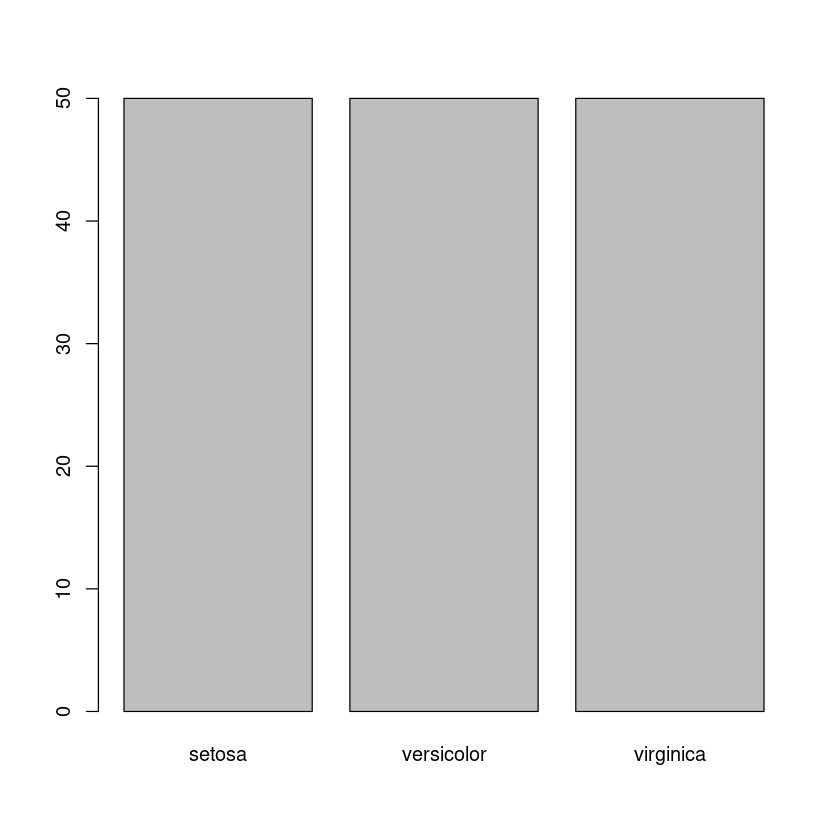

In [9]:
plot(iris$Species)

Por otra parte, la combinación de un factor y un vector nos proporciona un diagrama de cajas de cada uno de los valores de los factores. Este diagrama muestra el resumen de cinco números de un conjunto de datos. El resumen de cinco números es el valor mínimo, el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3) y el valor máximo.

En el ejemplo vemos el diagrama de cajas de la característica `Sepal.Lenght` según la variable `Species` como cambiamos las leyendas de los ejes con los parámetros: `xlab` y `ylab`:

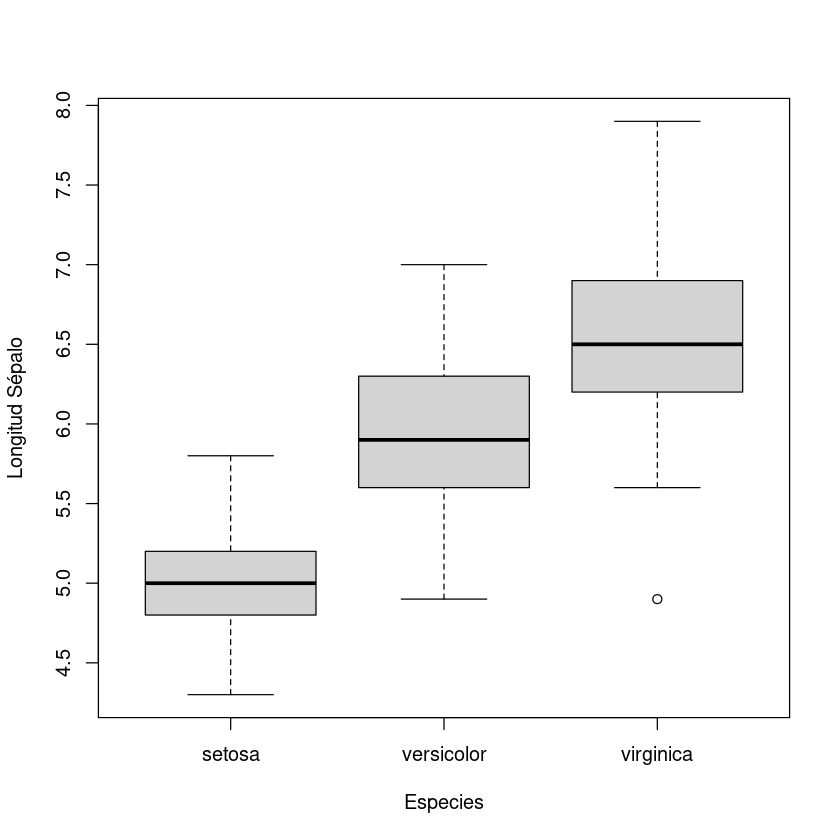

In [12]:
plot(iris$Species, iris$Sepal.Length, xlab="Especies", ylab="Longitud Sépalo")

Veamos que sucede cuando esta función recibe un _dataframe_:

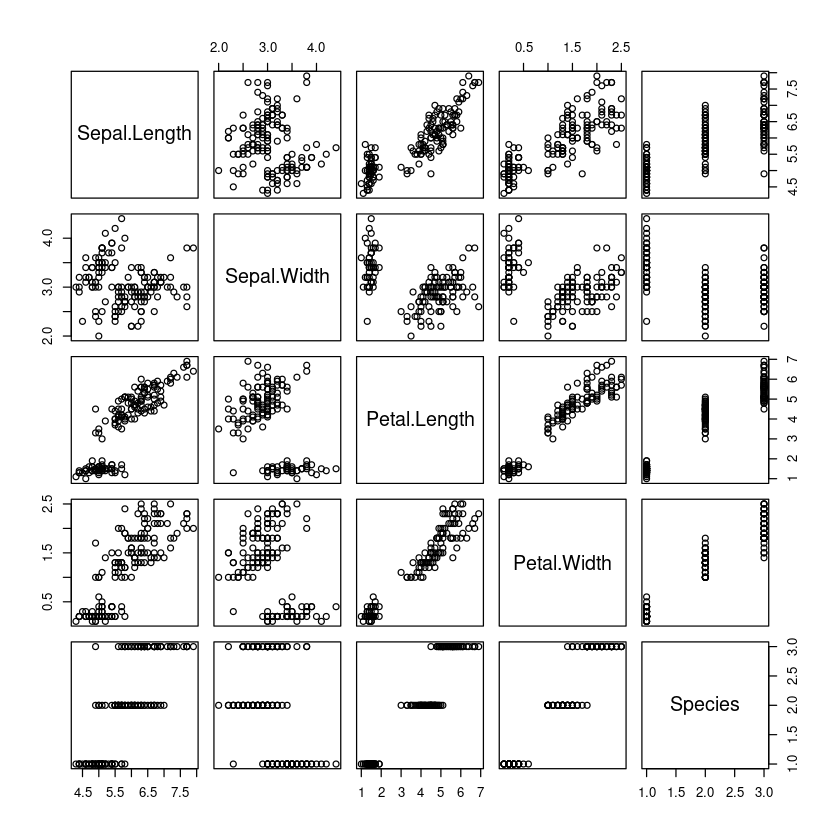

In [13]:
plot(iris)

### Hist

Con la función `hist` podemos dibujar un histograma. Un histograma es un gráfico que permite descubrir y mostrar la distribución de frecuencia de un conjunto de datos, además permite la inspección de valores atípicos, asimetría...

Veamos el histograma de la longitud del sépalo, en este caso añadimos un nuevo parámetro: `col`.

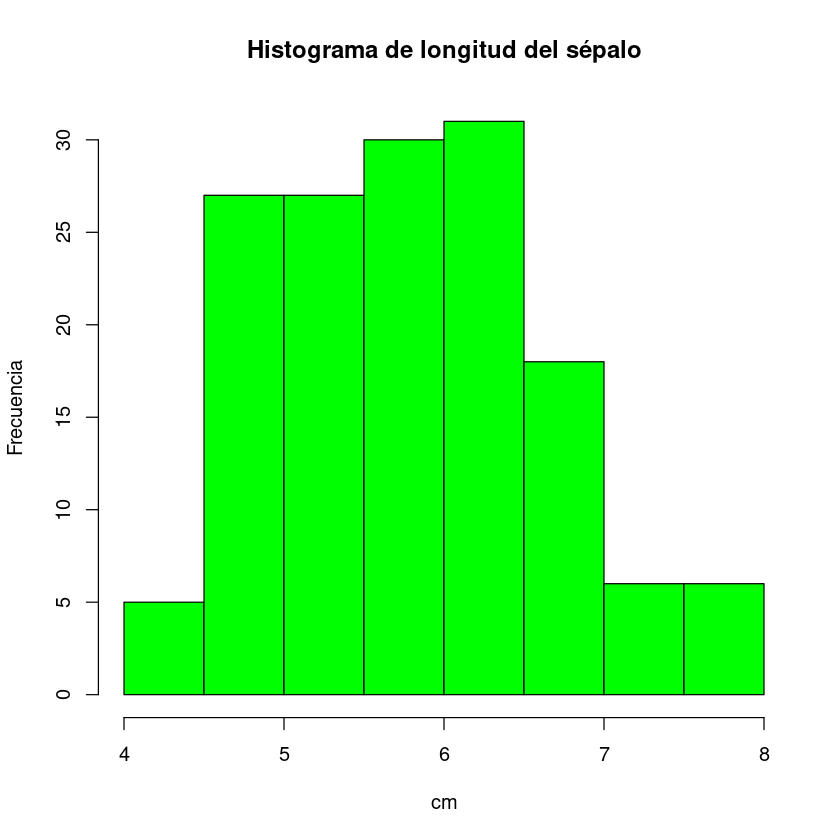

In [25]:
hist(iris$Sepal.Length, main="Histograma de longitud del sépalo",
     xlab="cm", ylab="Frecuencia", col="green")

Podemos personalizar los intervalos que queremos mostrar indicando el parámetro `breaks`:

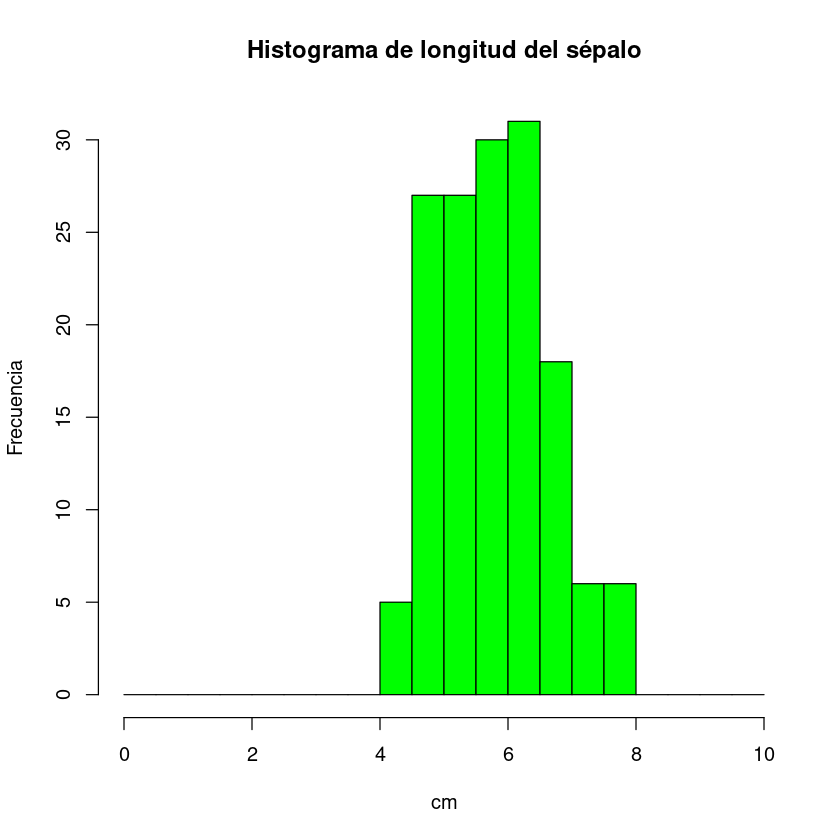

In [32]:
hist(iris$Sepal.Length, breaks=seq(0,10, 0.5),
main="Histograma de longitud del sépalo",
     xlab="cm", ylab="Frecuencia", col="green")

### Boxplot

La función `boxplot` realiza el diagrama de cajas, tanto de un vector como de un _dataframe_, los valores que muestra son los 5 mismos que con la función `plot` cuando recibía un factor y un vector. Veamos un sencillo ejemplo en el que aprovechamos para ilustrar  como asignar un color a cada sub diagrama:



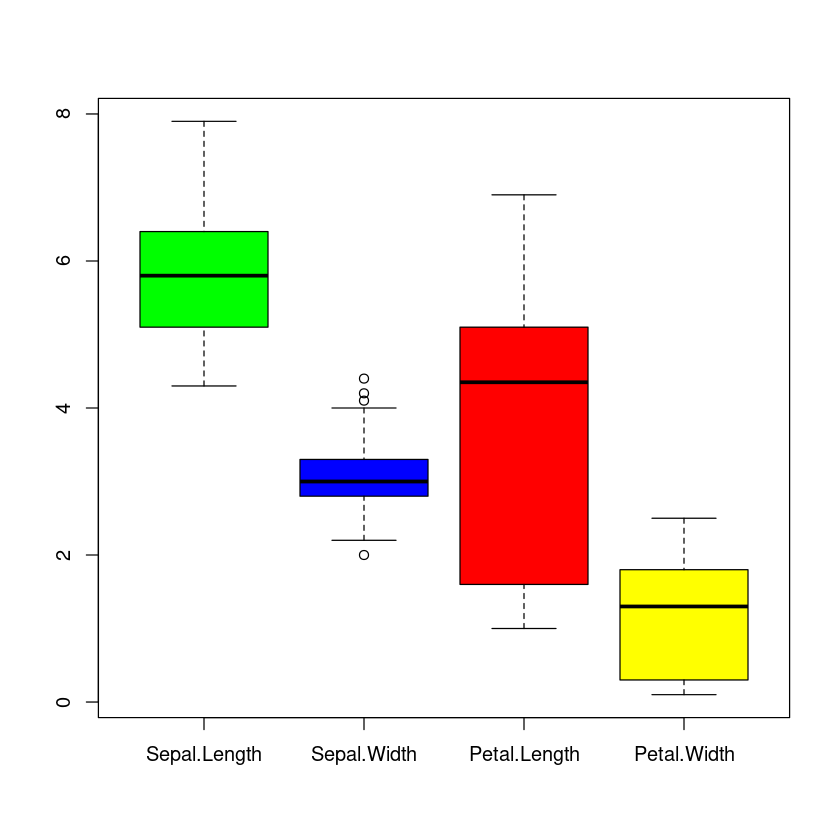

In [37]:
boxplot(iris[1:4], col=c("green", "blue", "red", "yellow"))

## ggplot2

Para la realización de los ejemplos de esta sección usaremos el conjunto de datos _Palmer Penguins_ con el que ya hemos trabajado anteriormente. Recordemos como podemos instalar y obtener los datos de este conjunto:

```r
> install.packages("palmerpenguins")
> library(palmerpenguins)

> str(penguins)
> View(penguins)
```

La instalación de la libreria se puede realizar con la siguiente instrucción. También podríamos instalar todo el paquete de `tidyverse` que ya incluye `ggplot2`:

In [75]:
install.packages("ggplot2")
library(ggplot2)
library(dplyr)
install.packages("palmerpenguins")
library(palmerpenguins)

penguins = penguins %>% filter(!is.na(sex))  # eliminamos los valores NA

Installing package into ‘/home/uib/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/home/uib/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



### ggplot

El funcionamiento de esta libreria se basa en el uso de la función `ggplot`. Esta crea un sistema de coordenadas al que podemos agregar las  capas gráficas que consideremos necesarias. El primer argumento de `ggplot` es el conjunto de datos que se usará en el gráfico. La instrucción `ggplot(data = penguins)` crea un gráfico vacío, a continuación aprenderemos como podemos añadir información.

La función `geom_point` agrega una capa de puntos a nuestro diagrama, lo que crea un gráfico de dispersión. `ggplot2` nos permite usar muchas funciones del tipo _geom_, cada una de las cuales agrega un tipo diferente de capa a nuestro gráfico. Durante esta lección veremos algunas de ellas, podemos encontrarlas todas en la [documentación oficial](https://ggplot2.tidyverse.org/reference/#layers) de la libreria.

Cada función del tipo _geom_ en la librería `ggplot2` recibe un argumento de mapeo. Este define cómo las variables en su conjunto de datos se asignan a las diferentes propiedades visuales. El argumento de mapeo siempre se combina con la función `aes`, y los argumentos `x` e `y` de `aes` especifican qué variables asignar a los ejes `x` e `y`. `ggplot2` se encarga de buscar las variables asignadas en el argumento de datos:

Veamos un primer ejemplo de como dibujar la relación entre su peso y la amplitud del pico de los pingüinos. Debemos fijarnos en el mensaje de alerta que recibimos tras llamar a la función de dibujado:


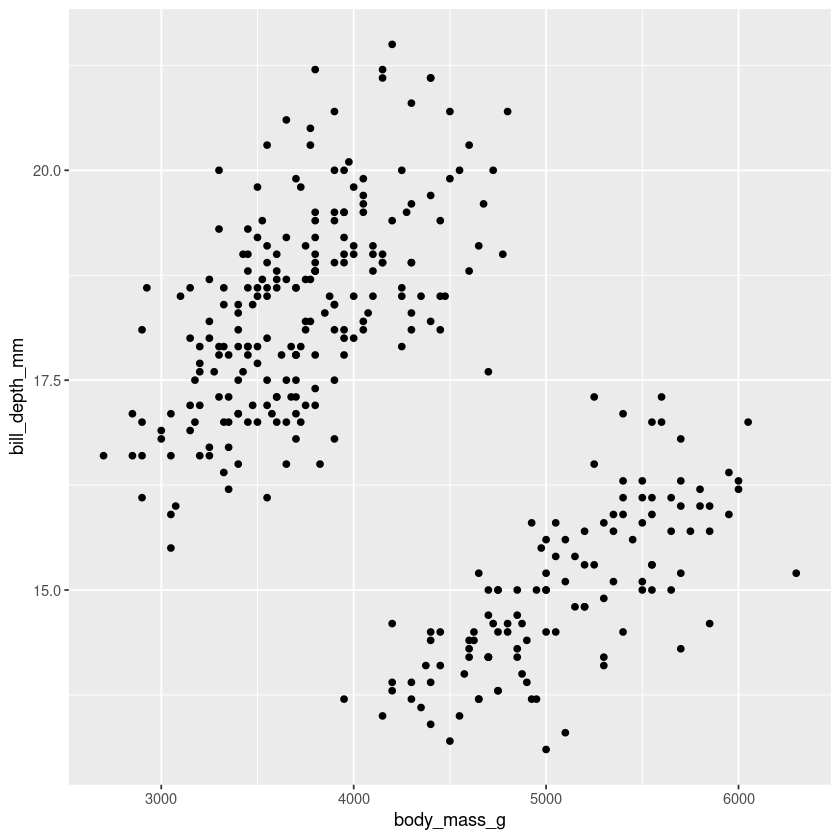

In [76]:
ggplot(data = penguins) +
  geom_point(mapping = aes(x = body_mass_g, y = bill_depth_mm))

Ahora que hemos realizado nuestro primer gráfico, veamos como podemos generalizar este conocimiento para poder construir una plantilla que nos sirva en múltiples ocasiones:

```r
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

Para hacer un gráfico, debemos remplazar las secciones entre llaves en el código anterior con un conjunto de datos, una función _geom_ en el segundo caso y realizar las asignaciones de variables en el caso de _MAPPINGS_.

Además, podemos agregar nuevas variables a la función `aes` de un diagrama de dispersión bidimensional para añadir/asignar estética. Una estética es una propiedad visual de los objetos en el gráfico. La estética incluye cosas como el tamaño, la forma o el color de los puntos que representan la información. Podemos realizar estos cambios, modificando los valores de sus propiedades estéticas.

Veamos como modificar el color de los puntos en el gráfico anterior según la variable `species`:

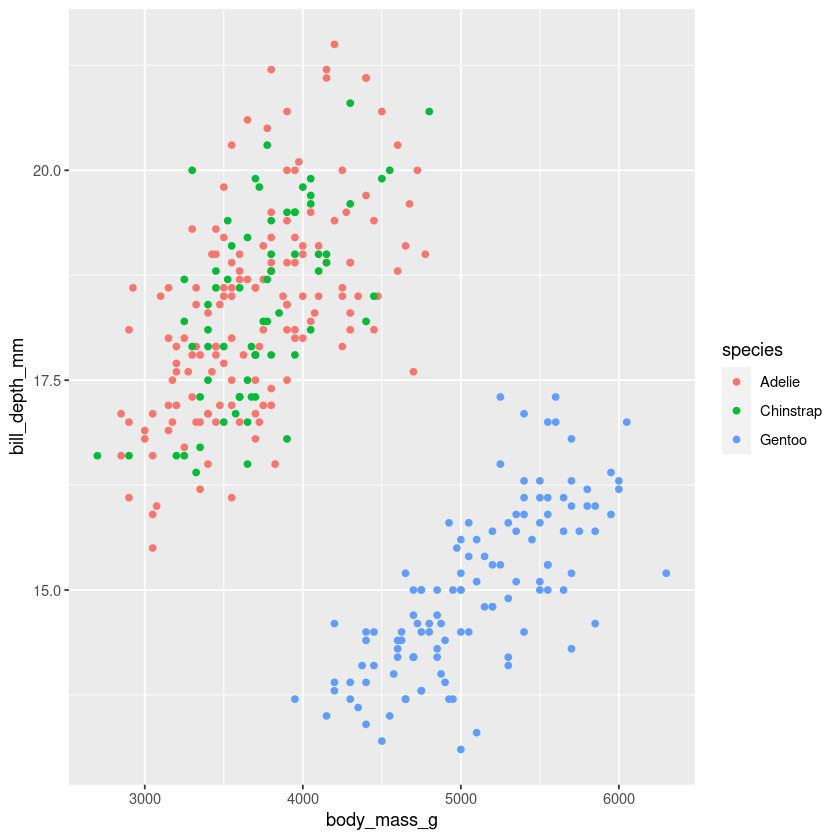

In [77]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = body_mass_g, y = bill_depth_mm, color=species))

En general, para asignar una estética a un nivel del gráfico, debemos pasar como parámetro el nombre de la estética al nombre de la variable dentro de la función `aes`. `ggplot2` asignará automáticamente un nivel único de la estética (en este caso, un único color) a cada valor único de la variable, este es un proceso conocido como escalado. Podemos observar como la propia librería se encarga de añadir la leyenda según la estética que hemos elegido.

En el ejemplo anterior, hemos mapeado la clase a la estética del color, pero podríamos haber mapeado la clase a la estética del tamaño. En este caso, el tamaño exacto de cada punto revelaría su afiliación de clase.

Warning message:
“Using size for a discrete variable is not advised.”


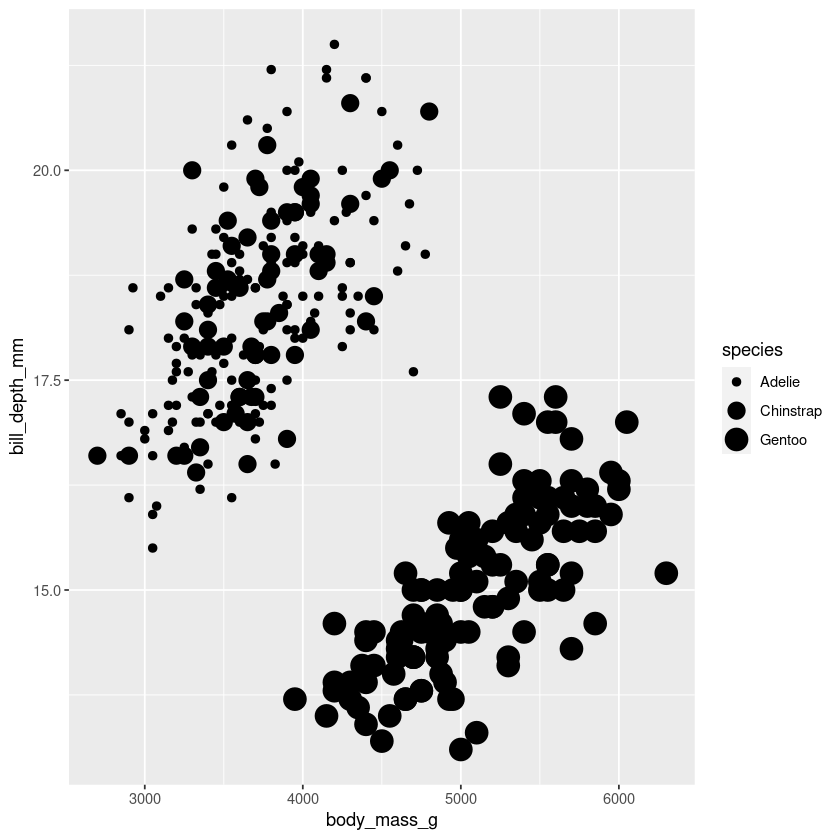

In [78]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = body_mass_g, y = bill_depth_mm, size=species))

Otras estéticas muy usadas son `alpha` o `shape`que controlan la transparencia y forma del punto respectivamente. Podemos combinar diferentes en el mismo gráfico, aunque hay que tener en cuenta la claridad del gráfico antes de añadir más información:

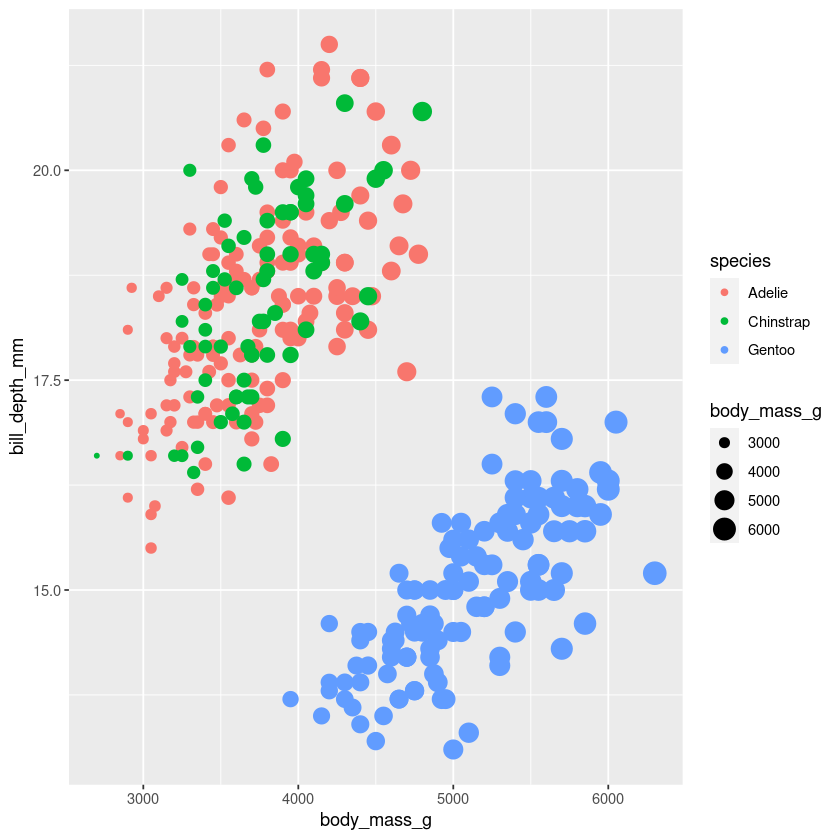

In [80]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = body_mass_g, y = bill_depth_mm, color=species, size=body_mass_g))

Una vez que hemos mapeado una estética, `ggplot2` se encarga del resto. Selecciona una escala razonable para usar con la estética y construye una leyenda que explica el mapeo entre niveles y valores. Para la estética de los parámetros `x` e `y`, `ggplot2` no crea una leyenda, pero crea líneas tanto en el eje horizontal como en el vertical con marcas y una etiqueta. La línea del eje actúa como una leyenda; explica el mapeo entre ubicaciones y valores.

Por otra parte, también es posible establecer las propiedades estéticas de la variable geom de forma manual. Por ejemplo vamos a hacer que en lugar de puntos, el gráfico se muestre con cruces rojas:

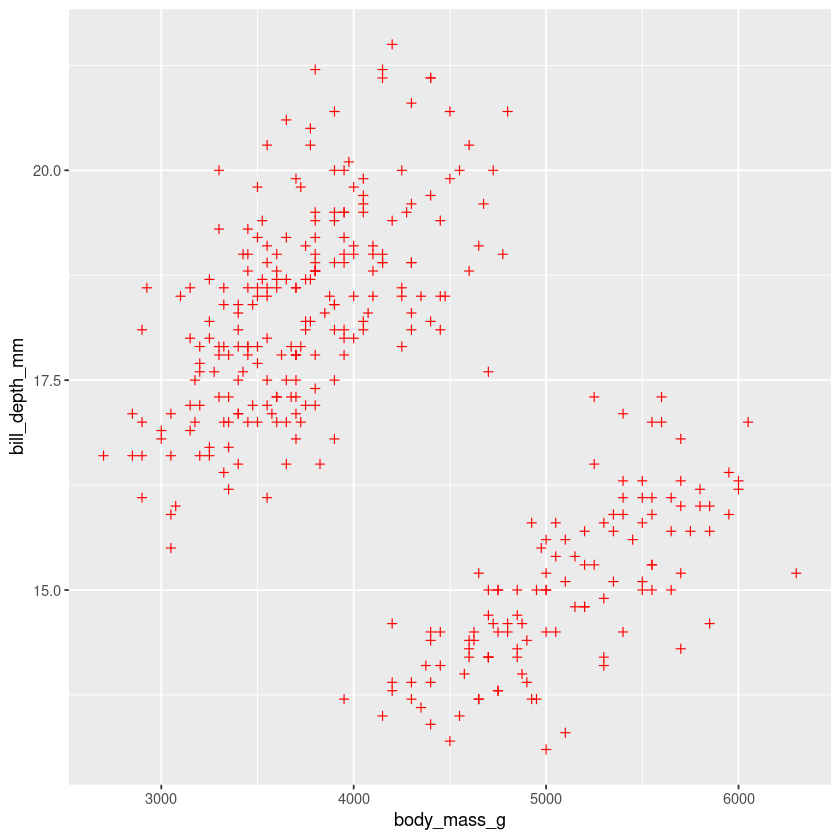

In [81]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = body_mass_g, y = bill_depth_mm),  color="red", shape=3)

La diferencia radica en que en este último ejemplo los parámetros estéticos pertenecen a la función _geom_, en concreto a `geom_point`.


### Objetos geométricos

Como ya hemos comentado anteriormente, _geo_m es el objeto geométrico que utiliza un gráfico para representar datos. Por ejemplo, los gráficos de barras utilizan la función `geom_bar`, los gráficos de líneas utilizan `geom_line`, los diagramas de caja utilizan `geom_boxplot`, etc. Ya sabemos que los diagramas de dispersión utilizan `geom_point`.

La idea general es que podemos usar diferentes _geoms_ para mostrar los mismos datos. Para cambiar la _geom_ de un gráfico, es suficiente con modificar la función _geom_ que añadimos a la función `ggplot`. Por ejemplo, para hacer los diagramas de arriba, puedes usar este código:

La primera gráfica usa la función `geom_point` y la segunda gráfica usa la función `geom_smooth` que básicamente consiste en una línea ajustada a los datos. En este caso cambiamos las variables que dibujamos para hacer el ejemplo más útil:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



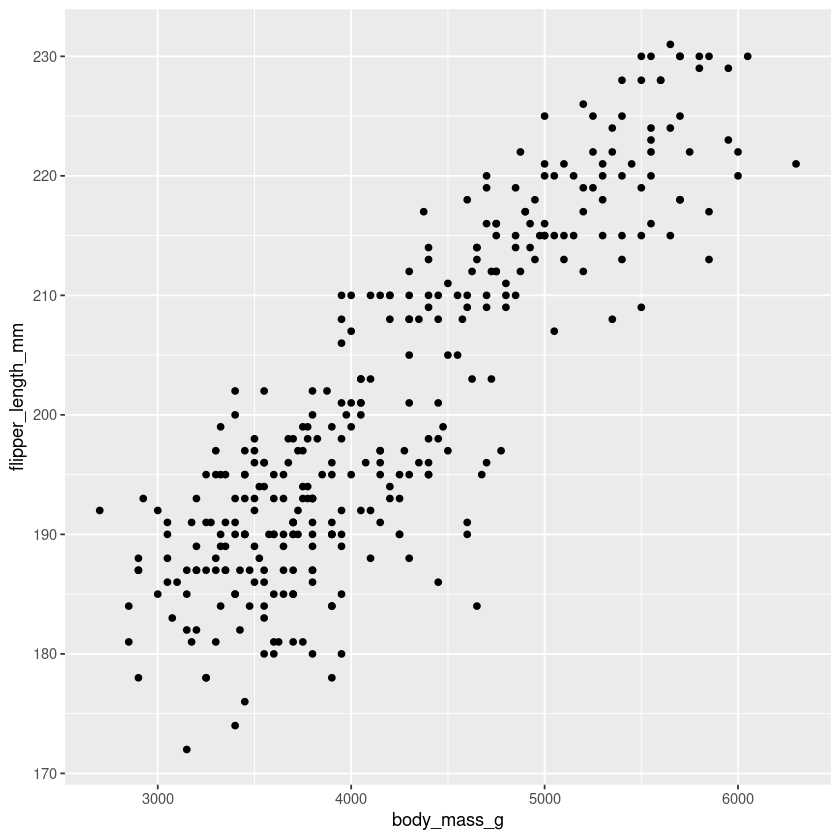

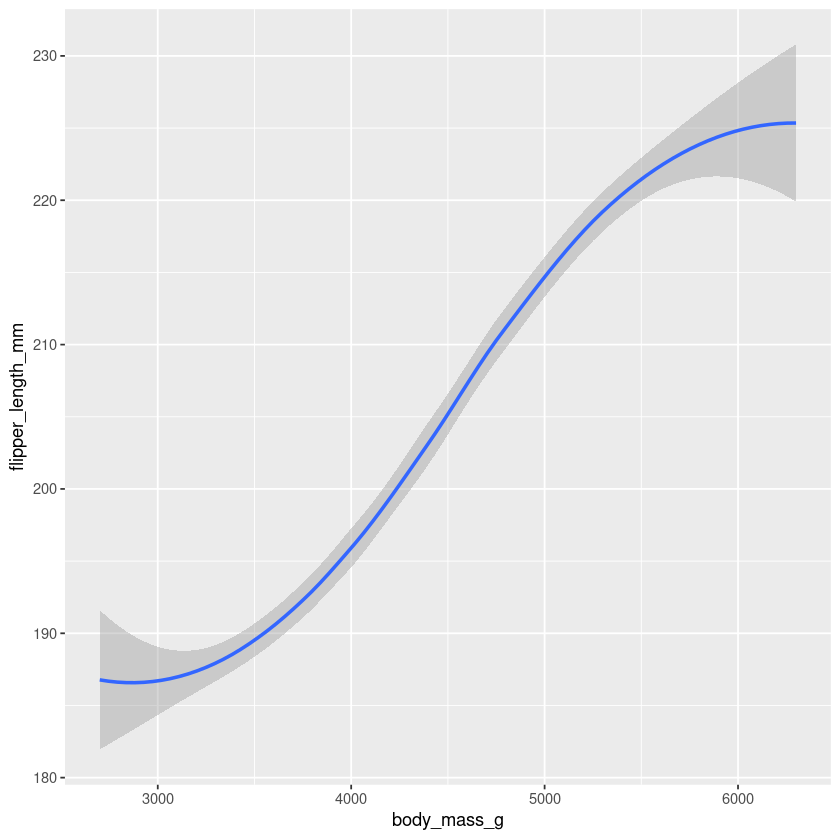

In [82]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = body_mass_g, y = flipper_length_mm))
ggplot(data = penguins) +
    geom_smooth(mapping = aes(x = body_mass_g, y = flipper_length_mm))

Cada función _geom_ debe tomar una argumento de mapeo. Sin embargo, no todas las estéticas funcionan con todas las _geom_ que tenemos disponibles. Por ejemplo, podemos establecer que forma tomará un punto, pero no es posible decidir cuál es la forma  de una línea pero si su estilo (`linetype`).

`geom_smooth`, usa un solo objeto geométrico para mostrar varias filas de datos, pero podemos usar el parámetro `group`de la estética para poder dibujar diversos objetos. En concreto `ggplot2` dibujará un objeto separado para cada valor único de la variable que elijamos para la  agrupación. En la práctica, `ggplot2` agrupará automáticamente los datos de estos geoms siempre que asigne una estética a una variable discreta (como en el ejemplo del tipo de línea).

Veamos un ejemplo:


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



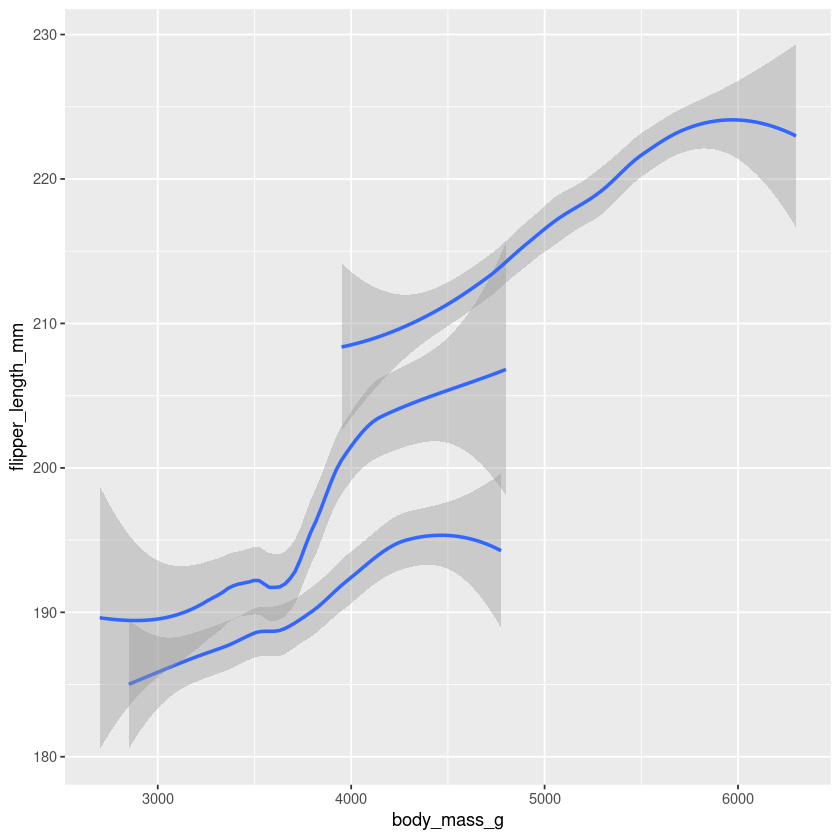

In [83]:
ggplot(data = penguins) +
    geom_smooth(mapping = aes(x = body_mass_g, y = flipper_length_mm, group=species))

Finalmente, veamos como añadir diferentes capas a un mismo gráfico. De una forma general podemos añadir capas a nuestros gráficos de manera sencilla, básicamente agregamos una capa tras otra:


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



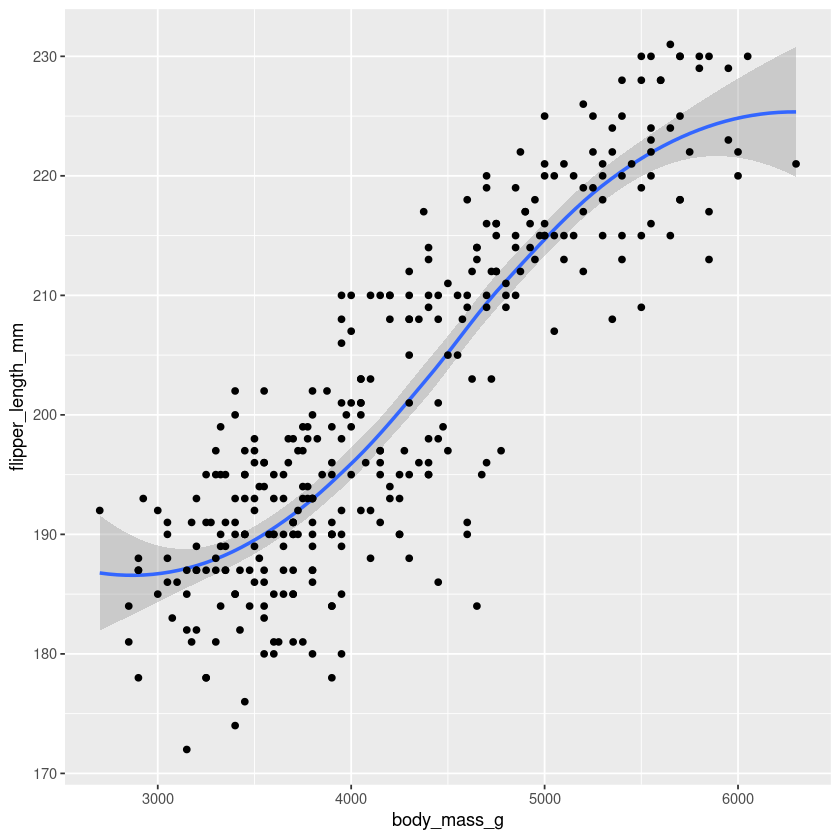

In [87]:
ggplot(data = penguins) +
    geom_smooth(mapping = aes(x = body_mass_g, y = flipper_length_mm)) +
    geom_point(mapping = aes(x = body_mass_g, y = flipper_length_mm))

Si nos fijamos bien, el código anterior introduce cierta duplicación. Si quisieramos cambiar el la variabla que ahora tenemos en el eje `y` para mostrar una diferente, tendríamos que cambiarla en dos lugares y existe la posibilidad que nos podamos olvidar de actualizar uno de ellos. Podemos evitar este tipo de repetición pasando un conjunto de asignaciones a la función `ggplot`. Esta tratará estas asignaciones como asignaciones globales que se aplican a cada _geom_ del gráfico. En otras palabras, este código producirá la misma trama que el código anterior:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



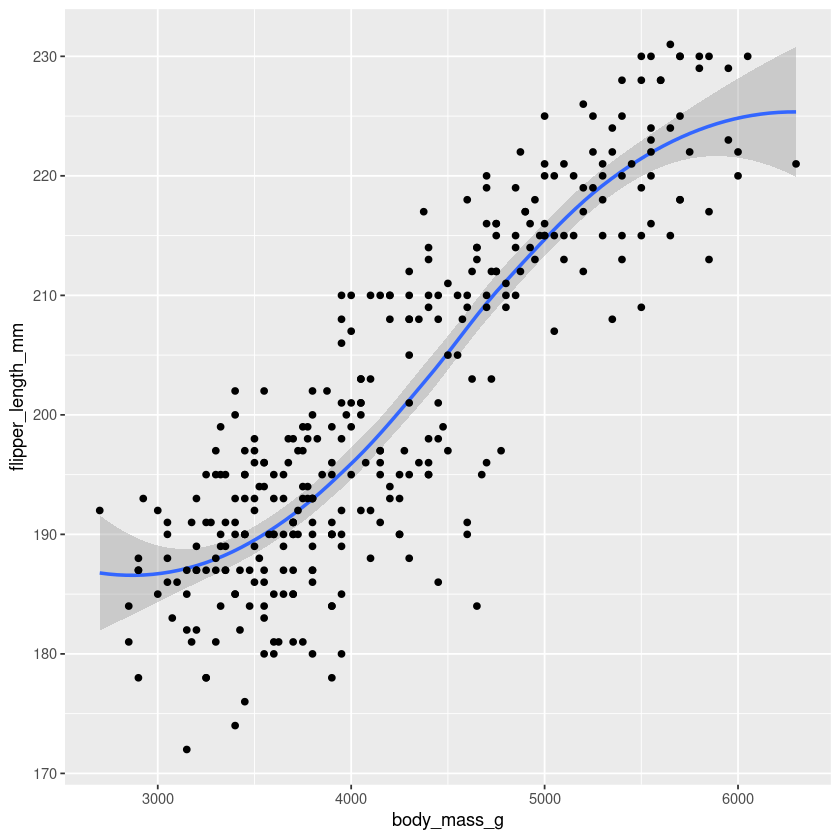

In [85]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = flipper_length_mm)) +
    geom_smooth() +
    geom_point()

Si elegimos realizar la estrategia anterior, `ggplot2` tratará el _mapping_ de la función `ggplot` como asignaciones locales para cada capa. Además, utilizará estas asignaciones locales para extender o sobrescribir las asignaciones globales, esto nos posibilita mostrar diferentes estéticas en diferentes capas. Veamos un ejemplo:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



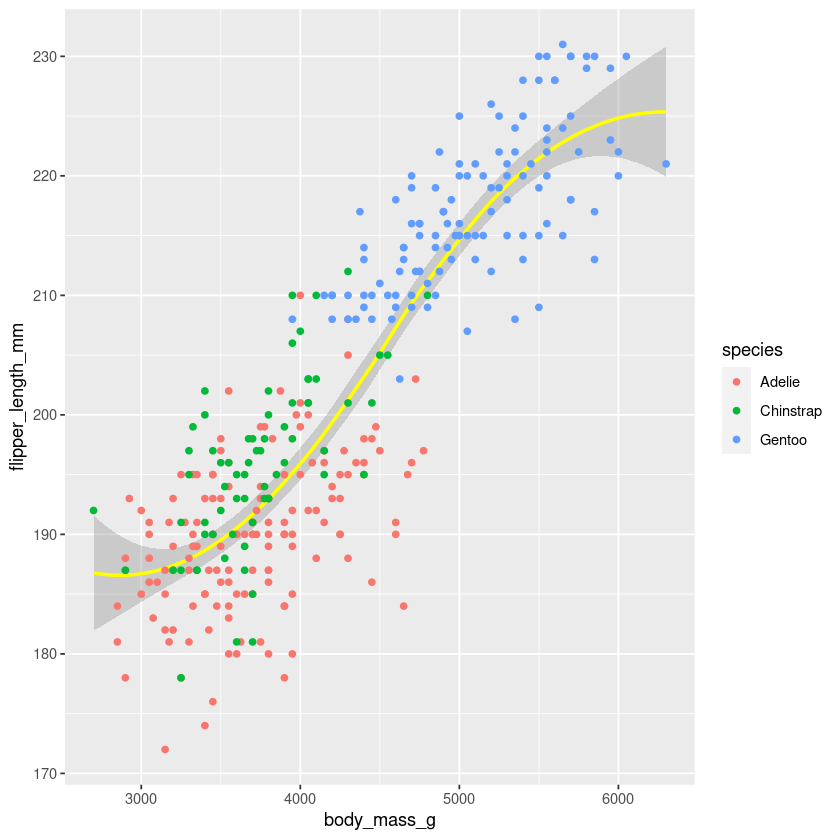

In [86]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = flipper_length_mm)) +
    geom_smooth(color = "yellow") +
    geom_point(mapping = aes(color=species))

###  Diagramas de barras

Una de las _geom_ que quizás pueda ser más útil son los diagramas de barra: `geom_bar` veremos un ejemplo que nos servirá para comprobar que todo el conocimiento que hemos adquirido en las secciones anteriores es aplicable a un nuevo tipo de gráfico.